In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import seaborn as sns
from scipy.stats import norm


In [2]:
# Create reference to CSV file
csv_path = "Metro_Interstate_Traffic_Volume.csv"
# Import the CSV into a pandas DataFrame
Traffic_Volume_df = pd.read_csv(csv_path)
Traffic_Volume_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
Traffic_Volume_df.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [4]:
#convert date_time to datetime
Traffic_Volume_df['date_time'] = pd.to_datetime(Traffic_Volume_df['date_time'])
Traffic_Volume_df.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object

In [5]:
#Convet Kelvin to Fahrenheit
#Run only once, if you see -ve values in temp, refresh df.

def Kel_to_Far(x):
    return(x - 273.15) * 9/5 + 32

Traffic_Volume_df['temp']=Traffic_Volume_df['temp'].apply(lambda x : Kel_to_Far(x))
Traffic_Volume_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,59.234,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,61.178,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,61.574,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,62.564,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,64.382,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [6]:
#missing holidays. Holiday value is present only at 0th hour of day. For oher hours of the holiday, value of hoiday is missing.
#validation for date date 10/08/2012 for holiday missing
missing_holiday = Traffic_Volume_df[Traffic_Volume_df['date_time'].dt.strftime('%m-%d-%Y')=='10-08-2012']
missing_holiday


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
126,Columbus Day,31.874,0.0,0.0,20,Clouds,few clouds,2012-10-08 00:00:00,455
127,NaN,31.046,0.0,0.0,20,Clouds,few clouds,2012-10-08 01:00:00,336
128,NaN,29.534,0.0,0.0,1,Clear,sky is clear,2012-10-08 02:00:00,265
129,NaN,28.220,0.0,0.0,1,Clear,sky is clear,2012-10-08 03:00:00,314
130,NaN,27.464,0.0,0.0,1,Clear,sky is clear,2012-10-08 04:00:00,779
131,NaN,26.924,0.0,0.0,1,Clear,sky is clear,2012-10-08 05:00:00,2571
132,NaN,25.628,0.0,0.0,20,Clouds,few clouds,2012-10-08 06:00:00,5563
133,NaN,26.348,0.0,0.0,20,Clouds,few clouds,2012-10-08 07:00:00,6676
134,NaN,28.544,0.0,0.0,20,Clouds,few clouds,2012-10-08 08:00:00,5966
135,NaN,33.008,0.0,0.0,20,Clouds,few clouds,2012-10-08 09:00:00,4832


In [7]:
#Holiday Cleanup. Fill up values for missing holiday values.
#Also, saves output in data_cleanup.csv for manual validation

for index, row in Traffic_Volume_df.iterrows():
 
    #if row['holiday'] !='None':
    if pd.notna(row['holiday']):
        holiday_value = row['holiday']

        for i in range (1,50):

            if index + i < len(Traffic_Volume_df):
               
                if Traffic_Volume_df.at[index+i, 'date_time'].date() == Traffic_Volume_df.at[index, 'date_time'].date() :

                    Traffic_Volume_df.at[index+i, 'holiday'] = holiday_value
           

            else: 
          
                break
Traffic_Volume_df.to_csv("data_cleanup.csv", index=False)



In [8]:
#validation for date date 10/08/2012 for holiday fill up.
filling_up_holiday = Traffic_Volume_df[Traffic_Volume_df['date_time'].dt.strftime('%m-%d-%Y')=='10-08-2012']
filling_up_holiday


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
126,Columbus Day,31.874,0.0,0.0,20,Clouds,few clouds,2012-10-08 00:00:00,455
127,Columbus Day,31.046,0.0,0.0,20,Clouds,few clouds,2012-10-08 01:00:00,336
128,Columbus Day,29.534,0.0,0.0,1,Clear,sky is clear,2012-10-08 02:00:00,265
129,Columbus Day,28.220,0.0,0.0,1,Clear,sky is clear,2012-10-08 03:00:00,314
130,Columbus Day,27.464,0.0,0.0,1,Clear,sky is clear,2012-10-08 04:00:00,779
131,Columbus Day,26.924,0.0,0.0,1,Clear,sky is clear,2012-10-08 05:00:00,2571
132,Columbus Day,25.628,0.0,0.0,20,Clouds,few clouds,2012-10-08 06:00:00,5563
133,Columbus Day,26.348,0.0,0.0,20,Clouds,few clouds,2012-10-08 07:00:00,6676
134,Columbus Day,28.544,0.0,0.0,20,Clouds,few clouds,2012-10-08 08:00:00,5966
135,Columbus Day,33.008,0.0,0.0,20,Clouds,few clouds,2012-10-08 09:00:00,4832


In [9]:
Traffic_Volume_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,59.234,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,61.178,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,61.574,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,62.564,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,64.382,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,50.540,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,49.298,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,49.244,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,48.092,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [10]:
# date_time duplicate for a date. 
#for example
duplicates= Traffic_Volume_df[Traffic_Volume_df['date_time'] == '2012-10-14 14:00']
duplicates

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
282,NaN,51.692,0.0,0.0,93,Mist,mist,2012-10-14 14:00:00,4358
283,NaN,51.692,0.0,0.0,93,Rain,light rain,2012-10-14 14:00:00,4358
284,NaN,51.692,0.0,0.0,93,Drizzle,light intensity drizzle,2012-10-14 14:00:00,4358


In [11]:
#remove duplicates for coulmn "date_time"
print("Before duplictes removal\n", Traffic_Volume_df.count())

duplicates = Traffic_Volume_df[Traffic_Volume_df.duplicated('date_time')]

print ("no. of duplicates:" , len(duplicates))

Traffic_Volume_df.drop_duplicates('date_time', inplace=True)
Traffic_Volume_df.to_csv("duplicates_removed.csv", index=False)
print("After duplictes removal\n", Traffic_Volume_df.count())

Before duplictes removal
 holiday                 1409
temp                   48204
rain_1h                48204
snow_1h                48204
clouds_all             48204
weather_main           48204
weather_description    48204
date_time              48204
traffic_volume         48204
dtype: int64
no. of duplicates: 7629
After duplictes removal
 holiday                 1203
temp                   40575
rain_1h                40575
snow_1h                40575
clouds_all             40575
weather_main           40575
weather_description    40575
date_time              40575
traffic_volume         40575
dtype: int64


In [12]:
# Validate if date_time duplicates removed 

duplicates_removed = Traffic_Volume_df[Traffic_Volume_df['date_time'] == '2012-10-14 14:00']
duplicates_removed

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
282,NaN,51.692,0.0,0.0,93,Mist,mist,2012-10-14 14:00:00,4358


In [13]:
#After removing duplicates
Traffic_Volume_df.count()

holiday                 1203
temp                   40575
rain_1h                40575
snow_1h                40575
clouds_all             40575
weather_main           40575
weather_description    40575
date_time              40575
traffic_volume         40575
dtype: int64

In [14]:
#Replace Null values to NonHoliday
#Traffic_Volume_df['holiday'] = Traffic_Volume_df['holiday'].replace({'NaN': 'NonHoliday'})
Traffic_Volume_df['holiday'].fillna('NonHoliday',inplace=True)
Traffic_Volume_df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NonHoliday,59.234,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NonHoliday,61.178,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NonHoliday,61.574,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NonHoliday,62.564,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NonHoliday,64.382,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [15]:
#Check if NaNs are replaced with NonHoliday
Traffic_Volume_df.count()

holiday                40575
temp                   40575
rain_1h                40575
snow_1h                40575
clouds_all             40575
weather_main           40575
weather_description    40575
date_time              40575
traffic_volume         40575
dtype: int64

In [16]:
#check if any of the cells is blank or na
if Traffic_Volume_df.isna().any().any():
    print("Datafrme containst blank cells (NA)")
else:
    print("Dataframe does not contain blank cells (NA)")

if Traffic_Volume_df.isnull().any().any():
    print("Datafrme containst blank cells (Null)")
else:
    print("Dataframe does not contain blank cells (Null)")

Dataframe does not contain blank cells (NA)
Dataframe does not contain blank cells (Null)


In [17]:
# Collect a list of all the unique values in "holiday"
Traffic_Volume_df["holiday"].unique()

array(['NonHoliday', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [18]:
# Collect a list of all the unique values in "weather_description"
Traffic_Volume_df["weather_description"].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'fog', 'proximity shower rain',
       'moderate rain', 'drizzle', 'heavy intensity rain',
       'proximity thunderstorm', 'haze', 'heavy snow',
       'thunderstorm with light rain', 'snow', 'light rain and snow',
       'light intensity shower rain', 'SQUALLS',
       'proximity thunderstorm with rain', 'thunderstorm with rain',
       'thunderstorm with heavy rain', 'heavy intensity drizzle',
       'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'thunderstorm', 'light snow',
       'smoke', 'freezing rain', 'light shower snow', 'sleet',
       'proximity thunderstorm with drizzle'], dtype=object)

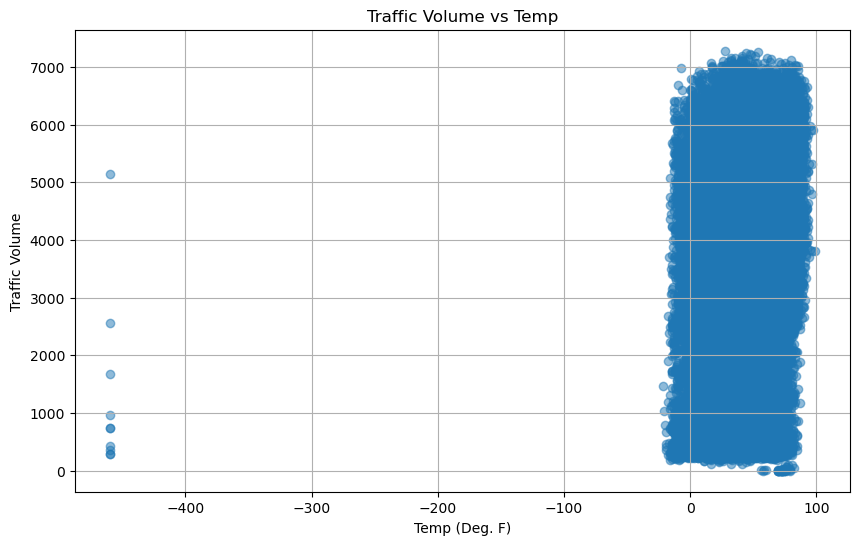

In [19]:
#Scatter plot of temp
plt.figure(figsize=(10,6))
plt.scatter(Traffic_Volume_df['temp'], Traffic_Volume_df['traffic_volume'], alpha=0.5)
plt.title('Traffic Volume vs Temp')
plt.xlabel('Temp (Deg. F)')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

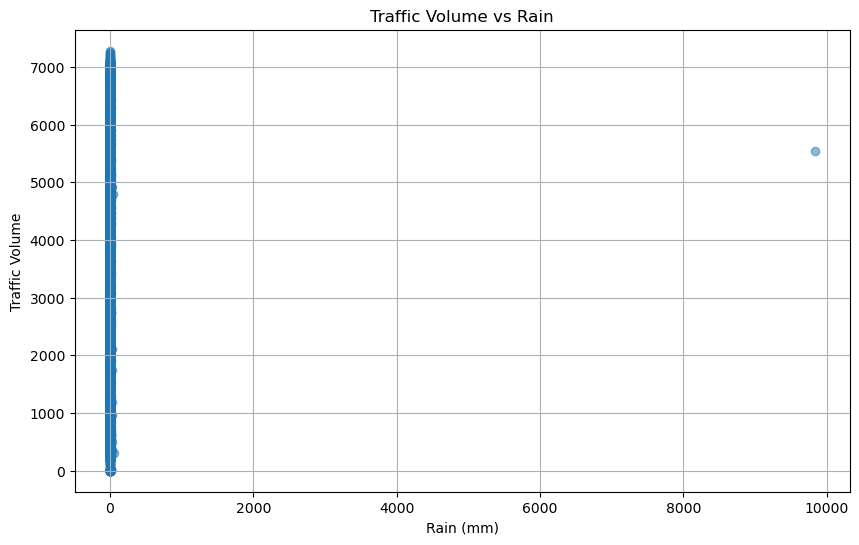

In [21]:
#Scatter plot of Rain
plt.figure(figsize=(10,6))
plt.scatter(Traffic_Volume_df['rain_1h'], Traffic_Volume_df['traffic_volume'], alpha=0.5)
plt.title('Traffic Volume vs Rain')
plt.xlabel('Rain (mm)')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

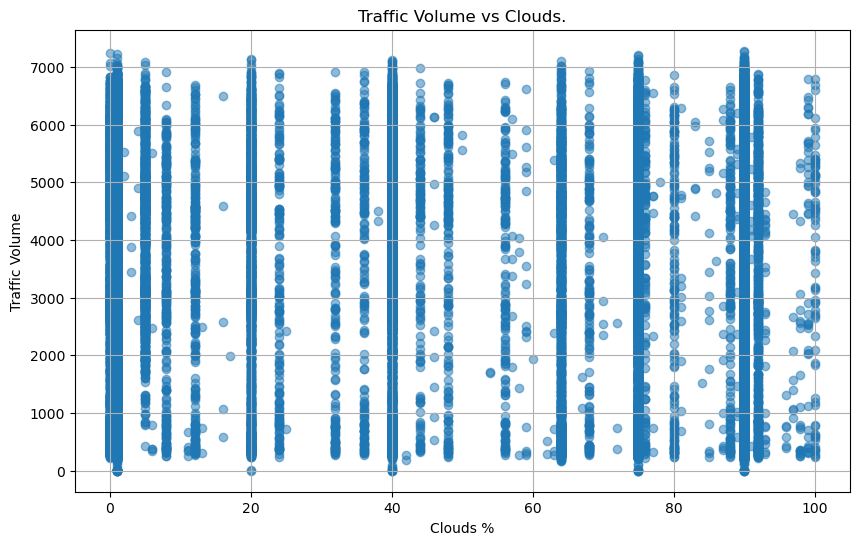

In [22]:
#Scatter plot of Cloud
plt.figure(figsize=(10,6))
plt.scatter(Traffic_Volume_df['clouds_all'], Traffic_Volume_df['traffic_volume'], alpha=0.5)
plt.title('Traffic Volume vs Clouds.')
plt.xlabel('Clouds %')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

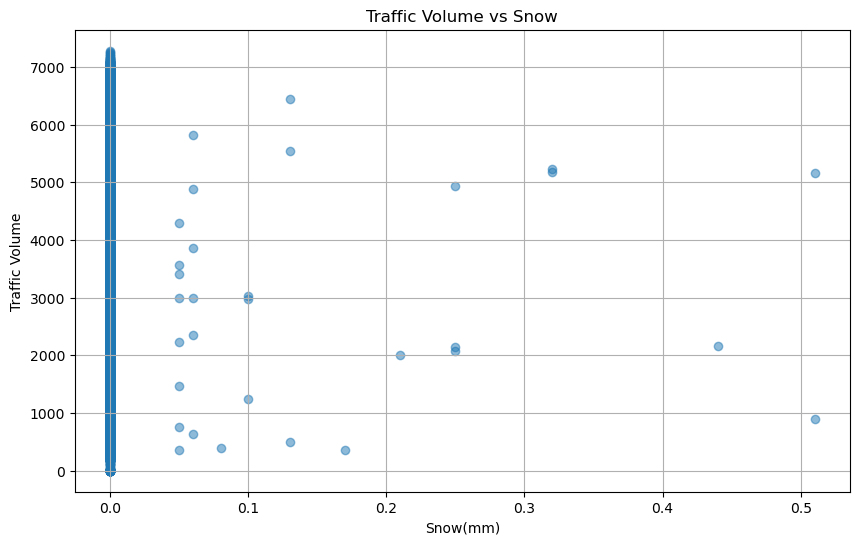

In [23]:
#Scatter plot of Snow
plt.figure(figsize=(10,6))
plt.scatter(Traffic_Volume_df['snow_1h'], Traffic_Volume_df['traffic_volume'], alpha=0.5)
plt.title('Traffic Volume vs Snow')
plt.xlabel('Snow(mm)')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

In [24]:
Traffic_Volume_df.count()

holiday                40575
temp                   40575
rain_1h                40575
snow_1h                40575
clouds_all             40575
weather_main           40575
weather_description    40575
date_time              40575
traffic_volume         40575
dtype: int64

In [25]:
#Oulier: Remove rows with rain <407 mm
Traffic_Volume_df = Traffic_Volume_df[Traffic_Volume_df['rain_1h'] < 407]
Traffic_Volume_df.count()

holiday                40574
temp                   40574
rain_1h                40574
snow_1h                40574
clouds_all             40574
weather_main           40574
weather_description    40574
date_time              40574
traffic_volume         40574
dtype: int64

In [26]:
#Outlier : Remove rows with temp > -50
Traffic_Volume_df = Traffic_Volume_df[Traffic_Volume_df['temp'] > -50]
Traffic_Volume_df.count()


holiday                40564
temp                   40564
rain_1h                40564
snow_1h                40564
clouds_all             40564
weather_main           40564
weather_description    40564
date_time              40564
traffic_volume         40564
dtype: int64

In [27]:
Traffic_Volume_df.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume
count,40564.000000,40564.000000,40564.000000,40564.000000,40564,40564.000000
mean,46.824084,0.076353,0.000117,44.209299,2015-12-24 02:14:28.937974528,3291.081402
min,-21.568000,0.000000,0.000000,0.000000,2012-10-02 09:00:00,0.000000
25%,29.660000,0.000000,0.000000,1.000000,2014-02-03 02:45:00,1249.750000
50%,49.491500,0.000000,0.000000,40.000000,2016-06-02 19:30:00,3429.000000
75%,66.434000,0.000000,0.000000,90.000000,2017-08-03 02:15:00,4952.000000
max,98.456000,55.630000,0.510000,100.000000,2018-09-30 23:00:00,7280.000000
std,23.567296,0.769729,0.005677,38.682163,NaN,1984.638849


In [28]:
#display max value from each column
#If DF contains numberical value, it will show maximum numerical value from the coulumn
#If DF contains non-numeric value(like strings), it will show maximum value based on lexicographical order (i.e the last value alphabetically)
Traffic_Volume_df.max()

holiday                Washingtons Birthday
temp                                 98.456
rain_1h                               55.63
snow_1h                                0.51
clouds_all                              100
weather_main                   Thunderstorm
weather_description         very heavy rain
date_time               2018-09-30 23:00:00
traffic_volume                         7280
dtype: object

In [29]:
#display min value from each column
#If DF contains numberical value, it will show maximum numerical value from the coulumn
#If DF contains non-numeric value(like strings), it will show maximum value based on lexicographical order (i.e the last value alphabetically)
Traffic_Volume_df.min()

holiday                      Christmas Day
temp                               -21.568
rain_1h                                0.0
snow_1h                                0.0
clouds_all                               0
weather_main                         Clear
weather_description                SQUALLS
date_time              2012-10-02 09:00:00
traffic_volume                           0
dtype: object

In [31]:
#Display information when traffic volume is  max
max_traffic_volume_index = Traffic_Volume_df['traffic_volume'].idxmax()
#print(max_traffic_volume_index)
max_traffice_volume_row = Traffic_Volume_df.loc[max_traffic_volume_index,:]


print ( "Diplay information when Traffic_Volume was maximum")
print(max_traffice_volume_row)


Diplay information when Traffic_Volume was maximum
holiday                         NonHoliday
temp                                 27.68
rain_1h                                0.0
snow_1h                                0.0
clouds_all                              90
weather_main                        Clouds
weather_description        overcast clouds
date_time              2017-03-09 16:00:00
traffic_volume                        7280
Name: 31615, dtype: object


In [32]:
#Display information when traffic volume is  min
min_traffic_volume_index = Traffic_Volume_df['traffic_volume'].idxmin()
#print(max_traffic_volume_index)
min_traffice_volume_row = Traffic_Volume_df.loc[min_traffic_volume_index,:]


print ( "Diplay information when Traffic_Volume was minimum")
print(min_traffice_volume_row)

Diplay information when Traffic_Volume was minimum
holiday                         NonHoliday
temp                                74.354
rain_1h                                0.0
snow_1h                                0.0
clouds_all                              40
weather_main                          Rain
weather_description             light rain
date_time              2016-07-23 18:00:00
traffic_volume                           0
Name: 25186, dtype: object


In [35]:
# Calculate the measures of central tendency

mean_numpy = np.mean(Traffic_Volume_df['traffic_volume'])
print("The mean Traffic Volume is :", format(mean_numpy,".2f"))

median_numpy = np.median(Traffic_Volume_df['traffic_volume'])
print(f"The median Traffic Volume is :", format(median_numpy,".2f"))


mode_scipy = sts.mode(Traffic_Volume_df['traffic_volume'])
print(f"The mode Traffic Volume is {mode_scipy}")


The mean Traffic Volume is : 3291.08
The median Traffic Volume is : 3429.00
The mode Traffic Volume is ModeResult(mode=356, count=40)


c:\Users\rajeev_daithankar\AppData\Local\Continuum\anaconda3\envs\dev_boot\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


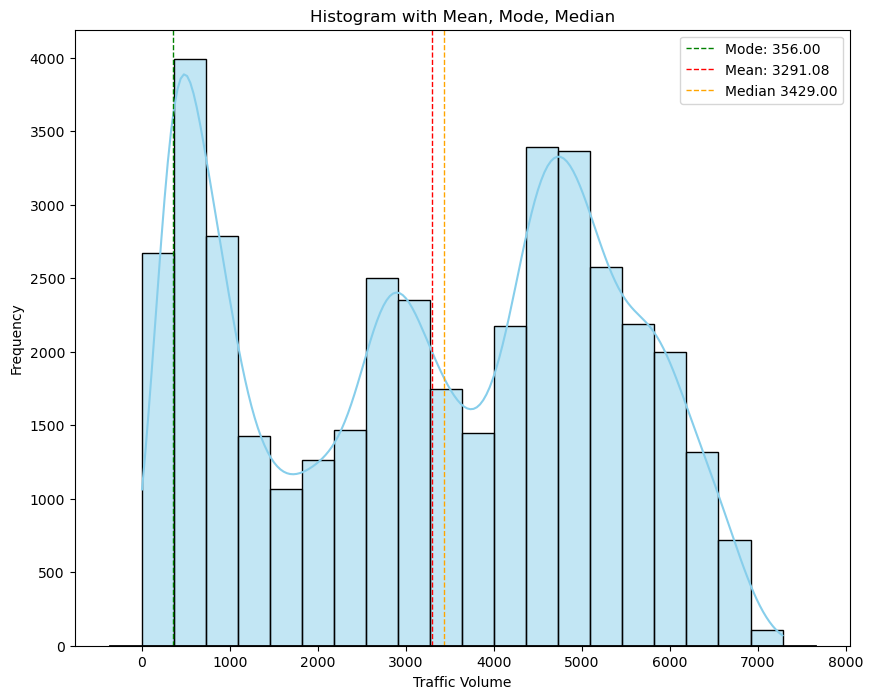

In [37]:
#Histogram for Mean, Median, Mode
mean_value =  Traffic_Volume_df['traffic_volume'].mean()
mode_value = Traffic_Volume_df['traffic_volume'].mode()[0]
median_value = Traffic_Volume_df['traffic_volume'].median()

#plot histogram with Kernel Denstiy Estimate
plt.figure(figsize=(10,8))
sns.histplot(Traffic_Volume_df['traffic_volume'], kde=True, color='skyblue', bins=20)


plt.axvline(mode_value, color='green', linestyle ='dashed', linewidth = 1, label = f'Mode: {mode_value:.2f}')
plt.axvline(mean_value, color='red', linestyle ='dashed', linewidth = 1, label = f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='orange', linestyle ='dashed', linewidth = 1, label = f'Median {median_value:.2f}')

#Add legend
plt.legend()
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Histogram with Mean, Mode, Median')

#Add distributin curve
xmin, xmax = plt.xlim()
x= np.linspace(xmin, xmax, 100)
p=norm.pdf(x, mean_value,Traffic_Volume_df['traffic_volume'].std())
plt.plot(x,p, 'k', linewidth =2)
plt.show()

**Central Tendency**

For this dataset: The mode is significantly lower than both the mean and median, indicating that there is a peak towards lower end of distibution.

In this case, the distribution is negative skewed, as mean (3291.08) is less than median  (3429.00). This means that the tail of the distribution extends towards lower values, while bulk of data is concentrated towards higher values.

Refer [**Readme**](https://github.com/ajwilson79/traffic_volume_analysis/blob/rajeev_branch01/rajeev_branch01/Readme.md) for definitions/explanation


In [38]:
#calulate range of traffic_volume
range_traffic_volume = Traffic_Volume_df['traffic_volume'].max() - Traffic_Volume_df['traffic_volume'].min()
print("The max value of Traffic Volume is : ", Traffic_Volume_df['traffic_volume'].max())
print("The min value of Traffic Volume is : ", Traffic_Volume_df['traffic_volume'].min())
print("The range of Traffic Volume is : ", range_traffic_volume)

The max value of Traffic Volume is :  7280
The min value of Traffic Volume is :  0
The range of Traffic Volume is :  7280


In [39]:
# Calculate variance and standard deviation using NumPy
variance = np.var(Traffic_Volume_df['traffic_volume'])
print("The population variance  is : ", format(variance,".2f"))

stand_dev = np.std(Traffic_Volume_df['traffic_volume'])
print(f"The population standard deviation is : ", format(stand_dev,".2f"))

The population variance  is :  3938694.26
The population standard deviation is :  1984.61


In [41]:
# Find potential outliers by calculating the interquartile range (IQR)
Q1 = Traffic_Volume_df['traffic_volume'].quantile(0.25)
median = Traffic_Volume_df['traffic_volume'].quantile(0.5)
Q3 = Traffic_Volume_df['traffic_volume'].quantile(0.75)
IQR = Q3 - Q1

print(f"The lower quartile of Traffic Volume Q1 is : {Q1}")
print(f"The upper quartile of Traffic Volume Q3 is: {Q3}")
print(f"The interquartile range of Traffic Volume  IQR is: {IQR}")
print(f"The the median of temperTraffic Volume is: {median} ")

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Traffic Volume Q1 is : 1249.75
The upper quartile of Traffic Volume Q3 is: 4952.0
The interquartile range of Traffic Volume  IQR is: 3702.25
The the median of temperTraffic Volume is: 3429.0 
Values below -4303.625 could be outliers.
Values above 10505.375 could be outliers.


In [42]:
# Create a DataFrame of rows that could be outliers
outlier_df = Traffic_Volume_df.loc[(Traffic_Volume_df['traffic_volume'] < - 4417.0) |
                                (Traffic_Volume_df['traffic_volume'] > 10543.0 )]
outlier_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume


In [43]:
# How many potential outliers are there in the dataset?
len(outlier_df)

0

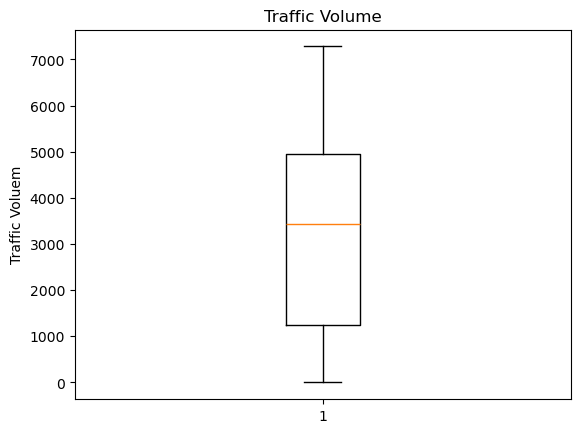

In [44]:
#Box plot to find any outliers
Traffic_volume_outlier = Traffic_Volume_df['traffic_volume']
fig1, ax1 = plt.subplots()
ax1.set_title('Traffic Volume')
ax1.set_ylabel('Traffic Voluem')
ax1.boxplot(Traffic_volume_outlier)
plt.show()

**Measures of Dispersion**

This dataset shows that there is high degree of variablity or scatter of data points around the mean.

Refer [**Readme**](https://github.com/ajwilson79/traffic_volume_analysis/blob/rajeev_branch01/rajeev_branch01/Readme.md) for definitions/explanation



**Mean and Std. Deviation**
Mean of traffic volme is 3291.08 (SD=1984.61)
SD of 1984.61 indicates how much variation there is from mean 3291.08

Interpretation:
1. Large SD indicates that data points are spread out widely around mean.
2. Mean is greater that SD, implies that there is significant variability or dispersion in dataset, with data points scatterd over a wide range.


In [45]:
# Calculate z-scores using SciPy
z_scipy = sts.zscore(Traffic_volume_outlier)
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are 0        1.135696
1        0.617207
2        0.743680
3        0.874184
4        0.819766
           ...   
48199    0.126936
48200   -0.257018
48201   -0.570429
48202   -0.927677
48203   -1.177600
Name: traffic_volume, Length: 40564, dtype: float64


<placehoder of z-score explanatino>

<Placeholder for zscore explanation>

Corrleation Matrix
                traffic_volume      temp   rain_1h   snow_1h  clouds_all
traffic_volume        1.000000  0.139231 -0.013433 -0.002091    0.078097
temp                  0.139231  1.000000  0.061370 -0.016310   -0.109840
rain_1h              -0.013433  0.061370  1.000000  0.000769    0.068299
snow_1h              -0.002091 -0.016310  0.000769  1.000000    0.024200
clouds_all            0.078097 -0.109840  0.068299  0.024200    1.000000


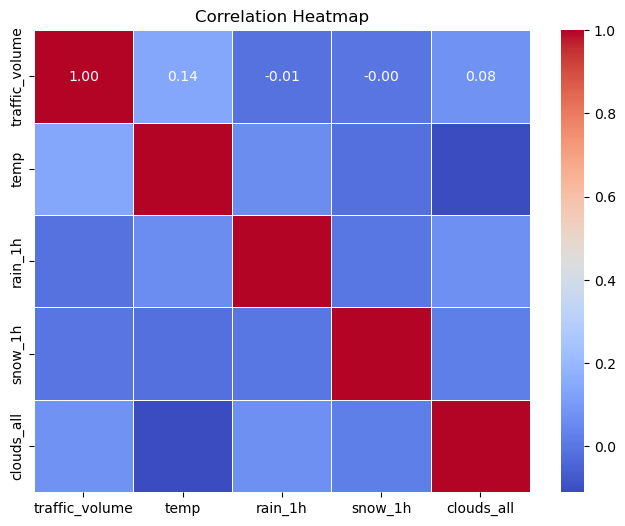


 Correlation Coefficients
Traffic Volume vs Temp 0.14
Traffic Volume vs rain -0.01
Traffic Volume vs Snow Fall -0.00
Traffic Volume vs Clouds 0.08


In [49]:
#import seaborn as sns

#Calulate Correlation Matrix
subset_df = Traffic_Volume_df[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]
correlation_matrix = subset_df.corr()
#print correlation matrix
print("Corrleation Matrix")
print (correlation_matrix)

#plot correlation heatmap
plt.figure(figsize=(8,6))
heatmap=sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f", linewidths=.5)

#heatmap.set_aspect('equal', adjustable ='box')

plt.title("Correlation Heatmap")
plt.show()

# #Print Corrleation coefficients
print("\n Correlation Coefficients")
print("Traffic Volume vs Temp", "{:.2f}".format(correlation_matrix.loc['traffic_volume', 'temp']))
print("Traffic Volume vs rain","{:.2f}".format (correlation_matrix.loc['traffic_volume', 'rain_1h']))
print("Traffic Volume vs Snow Fall", "{:.2f}".format(correlation_matrix.loc['traffic_volume', 'snow_1h']))
print("Traffic Volume vs Clouds", "{:.2f}".format(correlation_matrix.loc['traffic_volume', 'clouds_all']))

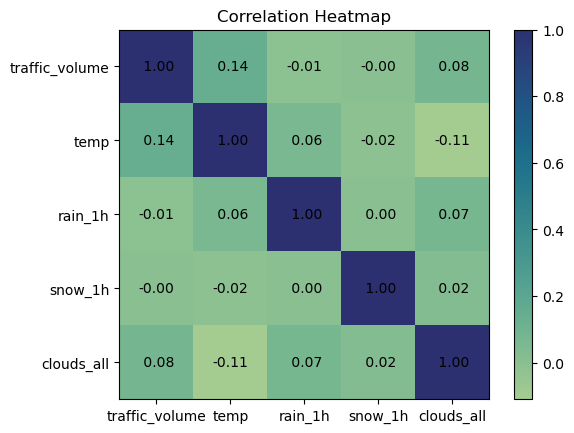

In [50]:
# heatmap using matplotlib
plt.Figure(figsize=(10,8))
plt.imshow(correlation_matrix, cmap='crest', interpolation='nearest')

#Annotation
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j,i, f"{correlation_matrix.iloc[i,j]: .2f}", ha='center', va='center', color ='black')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

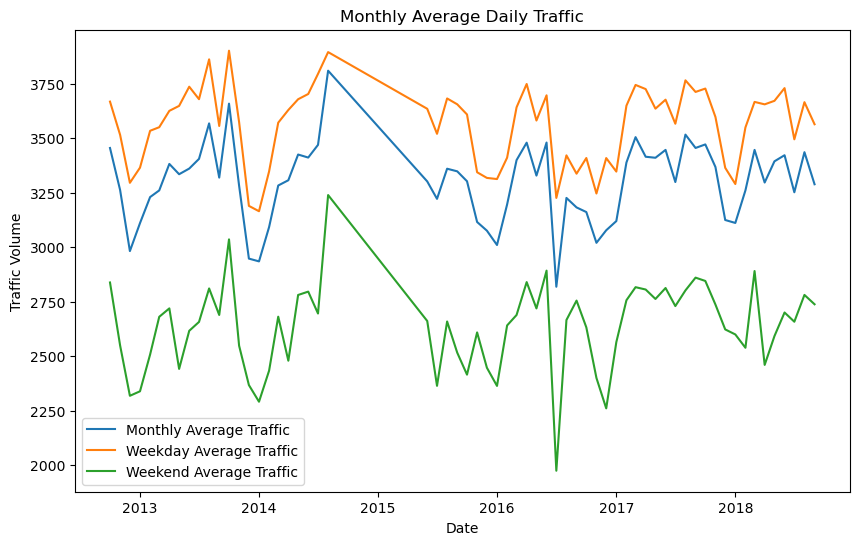

In [52]:
#Monthly Average Daily Traffic

#Extract day of the week
#Monday =0, Sunday =6 
Traffic_Volume_df['day_of_week'] = Traffic_Volume_df['date_time'].dt.day_of_week

#Group data by month and calculate average daily traffic

monthly_avg_traffic = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['traffic_volume'].mean()

#Separate data for weekdays and weekends
weekdays_data = Traffic_Volume_df[Traffic_Volume_df['day_of_week']<5]  #Weekdays Monday to Friday
weekends_data = Traffic_Volume_df[Traffic_Volume_df['day_of_week']>=5] #Weekends Saturday to Sunday

#Group Weekday and Weekend data  by month and calulate average daily traffic
weekday_avg_traffic = weekdays_data.groupby(weekdays_data['date_time'].dt.to_period('M'))['traffic_volume'].mean()
weekend_avg_traffic = weekends_data.groupby(weekends_data['date_time'].dt.to_period('M'))['traffic_volume'].mean()


# Plot graphs
plt.figure(figsize=(10,6))

#Monthly average daily traffic

plt.plot(monthly_avg_traffic.index.to_timestamp(), monthly_avg_traffic, label='Monthly Average Traffic')

#Weekday average daily traffic

plt.plot(weekday_avg_traffic.index.to_timestamp(), weekday_avg_traffic, label='Weekday Average Traffic')

#Weekend average daily traffic

plt.plot(weekend_avg_traffic.index.to_timestamp(), weekend_avg_traffic, label='Weekend Average Traffic')

plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.title('Monthly Average Daily Traffic')

plt.legend()

plt.show()


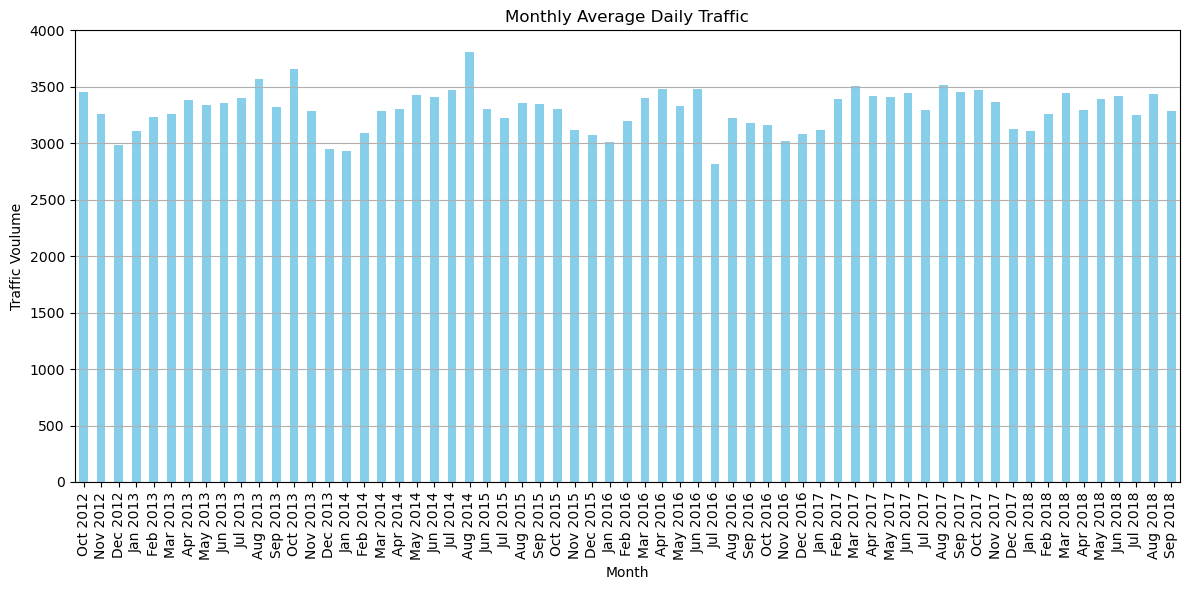

In [53]:
#plot bar chart - Monthly average
plt.figure(figsize=(12,6))
monthly_avg_traffic.plot(kind='bar', color='skyblue')

# Add data labels to bar chart
# for month, avg_traffic in zip(monthly_avg_traffic.index, monthly_avg_traffic):
#     plt.text(month.to_timestamp(), avg_traffic, f'{avg_traffic:.2f}', ha='center', va='bottom')

#titles and labels
plt.title ("Monthly Average Daily Traffic")
plt.xlabel('Month')
plt.ylabel('Traffic Voulume')
plt.xticks(range(len(monthly_avg_traffic.index)), monthly_avg_traffic.index.strftime('%b %Y'),rotation=90)
plt.grid(axis='y')
plt.tight_layout()

plt.show()


In [54]:
Traffic_Volume_df.dtypes

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
day_of_week                     int32
dtype: object

In [55]:
Traffic_Volume_df.reset_index(inplace=True)
Traffic_Volume_df

,index,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,day_of_week
0,0,NonHoliday,59.234,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1
1,1,NonHoliday,61.178,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1
2,2,NonHoliday,61.574,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1
3,3,NonHoliday,62.564,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1
4,4,NonHoliday,64.382,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1
...,...,...,...,...,...,...,...,...,...,...,...
40559,48199,NonHoliday,50.540,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543,6
40560,48200,NonHoliday,49.298,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781,6
40561,48201,NonHoliday,49.244,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159,6
40562,48202,NonHoliday,48.092,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450,6


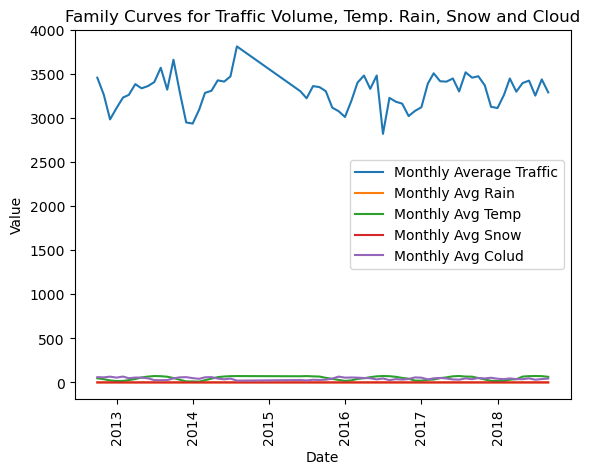

In [56]:
#Family Curves of for Rain, Temp, Snow, Cloud

Traffic_Volume_df['date_time'] = pd.to_datetime(Traffic_Volume_df['date_time'])
monthly_avg_traffic = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['traffic_volume'].mean()
plt.plot(monthly_avg_traffic.index.to_timestamp(), monthly_avg_traffic, label='Monthly Average Traffic')

monthly_avg_rain = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['rain_1h'].mean()
plt.plot(monthly_avg_rain.index.to_timestamp(), monthly_avg_rain, label='Monthly Avg Rain')

monthly_avg_temp = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['temp'].mean()
plt.plot(monthly_avg_temp.index.to_timestamp(), monthly_avg_temp, label='Monthly Avg Temp')

monthly_avg_snow = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['snow_1h'].mean()
plt.plot(monthly_avg_snow.index.to_timestamp(), monthly_avg_snow, label='Monthly Avg Snow')

monthly_avg_cloud = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['clouds_all'].mean()
plt.plot(monthly_avg_cloud.index.to_timestamp(), monthly_avg_cloud, label='Monthly Avg Colud')


#Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Family Curves for Traffic Volume, Temp. Rain, Snow and Cloud')
plt.legend()
plt.xticks(rotation=90)

#Show plot
plt.show()

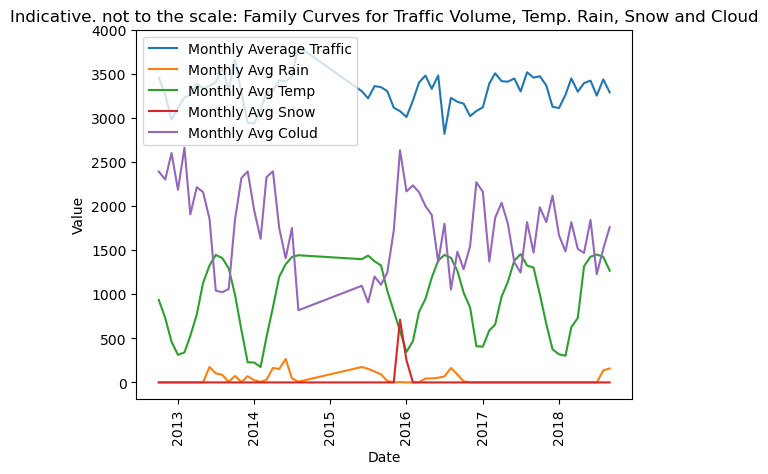

In [58]:
#Family of curnves zoomed out for Rain, Temp, Snow, Cloud for study

Traffic_Volume_df['date_time'] = pd.to_datetime(Traffic_Volume_df['date_time'])
monthly_avg_traffic = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['traffic_volume'].mean()
plt.plot(monthly_avg_traffic.index.to_timestamp(), monthly_avg_traffic, label='Monthly Average Traffic')

monthly_avg_rain = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['rain_1h'].mean()
plt.plot(monthly_avg_rain.index.to_timestamp(), monthly_avg_rain*500, label='Monthly Avg Rain')

monthly_avg_temp = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['temp'].mean()
plt.plot(monthly_avg_temp.index.to_timestamp(), monthly_avg_temp*20, label='Monthly Avg Temp')

monthly_avg_snow = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['snow_1h'].mean()
plt.plot(monthly_avg_snow.index.to_timestamp(), monthly_avg_snow*90000, label='Monthly Avg Snow')

monthly_avg_cloud = Traffic_Volume_df.groupby(Traffic_Volume_df['date_time'].dt.to_period('M'))['clouds_all'].mean()
plt.plot(monthly_avg_cloud.index.to_timestamp(), monthly_avg_cloud*40, label='Monthly Avg Colud')

#Set labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Indicative. not to the scale: Family Curves for Traffic Volume, Temp. Rain, Snow and Cloud')
plt.legend()
plt.xticks(rotation=90)

#Show plot
plt.show()


In [59]:
#Avg traffic for holidays and non-holidays
avg_traffic_by_holiday  = Traffic_Volume_df.groupby('holiday')['traffic_volume'].mean()
avg_traffic_by_holiday

holiday
Christmas Day                1764.283186
Columbus Day                 3393.533333
Independence Day             2155.175000
Labor Day                    2346.228814
Martin Luther King Jr Day    2732.362319
Memorial Day                 2095.649573
New Years Day                1794.526786
NonHoliday                   3313.464216
State Fair                   3837.100840
Thanksgiving Day             1995.990654
Veterans Day                 3301.759259
Washingtons Birthday         2830.547826
Name: traffic_volume, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

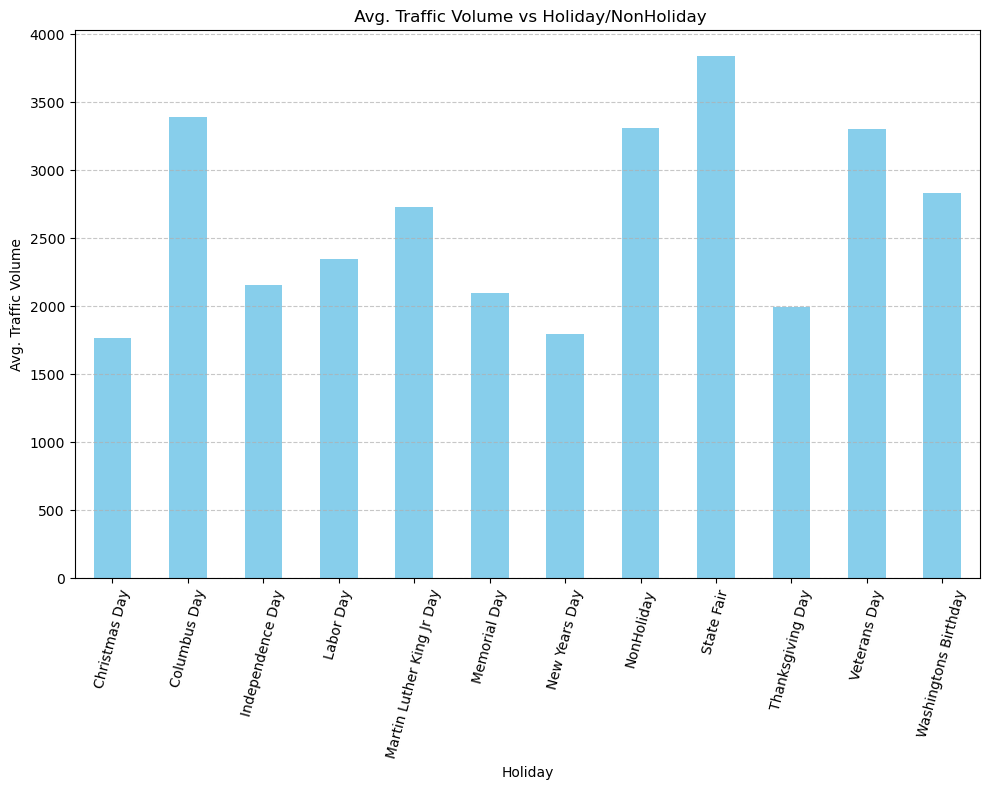

In [60]:
#plot graph for avg traffic holidays and non-holidays
plt.figure(figsize=(10,8))
avg_traffic_by_holiday.plot(kind='bar', color='skyblue')
plt.title( ' Avg. Traffic Volume vs Holiday/NonHoliday')
plt.xlabel('Holiday')
plt.ylabel('Avg. Traffic Volume')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show